In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings # ignore warnings that pop up

warnings.filterwarnings("ignore")

In [ ]:
apples_oranges = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Maze/Support Vector Machine/apples_and_oranges.csv")
# display first few rows of data
apples_oranges.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


<Axes: title={'center': 'Sizes and Weights of apples and oranges'}, xlabel='Weight', ylabel='Size'>

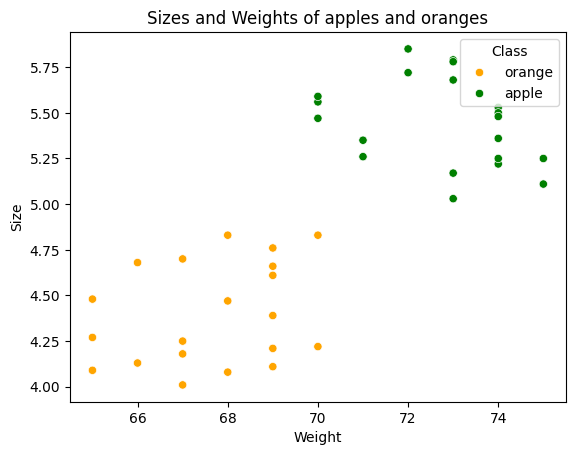

In [ ]:
# create a dictionary to colour classes
color_dict = {'orange':'orange',
                  'apple':'green'}
# scatterplot
plt.title('Sizes and Weights of apples and oranges')
sns.scatterplot(data=apples_oranges, x="Weight", y="Size", hue="Class", palette = color_dict)

In [ ]:
# define input data
X = apples_oranges[["Weight", "Size"]]

# define target
y = apples_oranges.Class

# fitting the support vector machine using a linear kernel
from sklearn import svm

#SVC = Support Vector Classification
# C = cost, with a higher cost the hyperplane will do everything to seperate the orange
#from the apple even if the oranges were mixed with the apples in the plot, with a lower cost
#the hyperplane will be produced in the middle
clf = svm.SVC(kernel = 'linear', C=10)
clf.fit(X, y)

SVC(C=10, kernel='linear')

In [ ]:
clf.coef_

array([[-0.65759054, -3.11967429]])

In [ ]:
clf.intercept_

array([62.09725159])

In [ ]:
b = clf.intercept_
w_1 = clf.coef_[0][0]
w_2 = clf.coef_[0][1]

print(b, w_1, w_2)

[62.09725159] -0.6575905440881797 -3.1196742877366077


62.09725159 - 0.6575905440882028*Weight - 3.1196742877366077*Size = 0

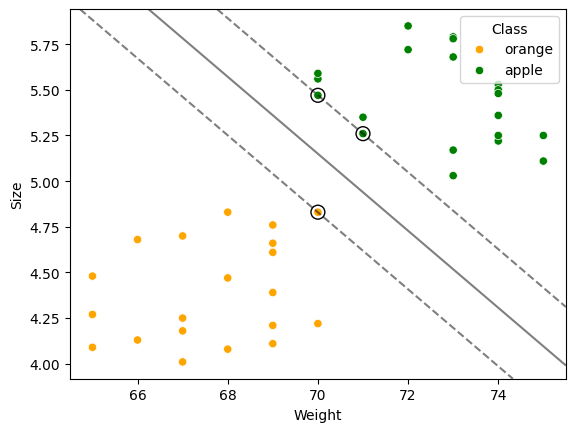

In [ ]:
# plotting the hyperplane and support vector lines

ax = plt.gca() #axis
sns.scatterplot(data=apples_oranges, x="Weight", y="Size", hue="Class", palette = color_dict)
xlim = ax.get_xlim() # obtain the minimum and maximum weigth values
ylim = ax.get_ylim() # obtain the minimum and maximum size values

xx = np.linspace(xlim[0], xlim[1], 2) # 2 equally spaced weigth values for the mimum and maximum values
yy = np.linspace(ylim[0], ylim[1], 2) # 2 equally spaced size values for the mimum and maximum values
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [ ]:
print(clf.support_vectors_)

[[70.    5.47]
 [71.    5.26]
 [70.    4.83]]


In [ ]:
ypred = clf.predict([[70, 4.6]])
ypred2 = clf.predict([[70, 5.8]])
print(ypred, ypred2)

['orange'] ['apple']
